In [1]:
'''General Libraries'''
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', 500)

'''Statistic'''
import scipy
from scipy import stats
from scipy.stats import norm
import datetime

'''Scikit Learn'''
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV

'''Ploting Libraries'''
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "notebook" 


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('RdBu')

'''Miscellaneous'''
from yellowbrick.regressor import ResidualsPlot
import missingno as msno

'''Seeds'''
import random
random.seed(10)
np.random.seed(11)


In [2]:
df = pd.read_csv('cleanData_to_kPrototypes.csv')

In [3]:
df.head()

,5k,10k,20k,half,25k,30k,35k,40k,official,pace,5k_avgSpeed,10k_avgSpeed,20k_avgSpeed,25k_avgSpeed,30k_avgSpeed,35k_avgSpeed,40k_avgSpeed,rank_overall,rank_in_gender_only,rank_in_division,age,age_division,gender,country,state
0,0.003409,0.007832,0.008234,0.008508,0.007689,0.008533,0.010421,0.010017,0.010147,0.010863,0.003409,0.007832,0.008234,0.007689,0.008533,0.010421,0.010017,0.000219,0.000398,0.001003,0.460317,0.3,M,JPN,others
1,0.106944,0.166667,0.157928,0.158276,0.150604,0.134029,0.128172,0.129555,0.127324,0.126930,0.106944,0.166667,0.157928,0.150604,0.134029,0.128172,0.129555,0.000626,0.000000,0.000000,0.238095,0.0,F,KEN,others
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.365079,0.2,M,RSA,others
3,0.106692,0.166562,0.157928,0.158276,0.150604,0.134029,0.128172,0.131521,0.130881,0.130932,0.106692,0.166562,0.157928,0.150604,0.134029,0.128172,0.131521,0.000814,0.000114,0.000287,0.095238,0.0,F,ETH,others
4,0.003409,0.005221,0.002550,0.002870,0.002344,0.001813,0.001074,0.001434,0.001375,0.001144,0.003409,0.005221,0.002550,0.002344,0.001813,0.001074,0.001434,0.000031,0.000057,0.000143,0.349206,0.2,M,JPN,others


In [17]:
df[['age_division', 'gender', 'country', 'state']] = df[['age_division', 'gender', 'country', 'state']].astype('category')

In [18]:
df.dtypes

5k                      float64
10k                     float64
20k                     float64
half                    float64
25k                     float64
30k                     float64
35k                     float64
40k                     float64
official                float64
pace                    float64
5k_avgSpeed             float64
10k_avgSpeed            float64
20k_avgSpeed            float64
25k_avgSpeed            float64
30k_avgSpeed            float64
35k_avgSpeed            float64
40k_avgSpeed            float64
rank_overall            float64
rank_in_gender_only     float64
rank_in_division        float64
age                     float64
age_division           category
gender                 category
country                category
state                  category
dtype: object

# K-Prototypes Clustering

In [5]:
categories = ['age_division', 'gender', 'country', 'state']

categories = [df.columns.get_loc(col) for col in categories if col in df]

print(categories)

[21, 22, 23, 24]


In [17]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

kp = KPrototypes(n_clusters=4, init='Huang', n_init=5, verbose=1, n_jobs=-1)
clusters = kp.fit_predict(df, categorical=categories)

# Print the cluster centroids
centroids = kp.cluster_centroids_


Best run was number 1


In [23]:
print(clusters)

[3 3 3 ... 0 0 1]


In [27]:
df['cluster'] = cluster_dict

In [30]:
df.head(20)

,5k,10k,20k,half,25k,30k,35k,40k,official,pace,5k_avgSpeed,10k_avgSpeed,20k_avgSpeed,25k_avgSpeed,30k_avgSpeed,35k_avgSpeed,40k_avgSpeed,rank_overall,rank_in_gender_only,rank_in_division,age,age_division,gender,country,state
0,0.003409,0.007832,0.008234,0.008508,0.007689,0.008533,0.010421,0.010017,0.010147,0.010863,0.003409,0.007832,0.008234,0.007689,0.008533,0.010421,0.010017,0.000219,0.000398,0.001003,0.460317,0.3,M,JPN,others
1,0.106944,0.166667,0.157928,0.158276,0.150604,0.134029,0.128172,0.129555,0.127324,0.126930,0.106944,0.166667,0.157928,0.150604,0.134029,0.128172,0.129555,0.000626,0.000000,0.000000,0.238095,0.0,F,KEN,others
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.365079,0.2,M,RSA,others
3,0.106692,0.166562,0.157928,0.158276,0.150604,0.134029,0.128172,0.131521,0.130881,0.130932,0.106692,0.166562,0.157928,0.150604,0.134029,0.128172,0.131521,0.000814,0.000114,0.000287,0.095238,0.0,F,ETH,others
4,0.003409,0.005221,0.002550,0.002870,0.002344,0.001813,0.001074,0.001434,0.001375,0.001144,0.003409,0.005221,0.002550,0.002344,0.001813,0.001074,0.001434,0.000031,0.000057,0.000143,0.349206,0.2,M,JPN,others
5,0.106944,0.166667,0.157928,0.158276,0.150687,0.134029,0.128172,0.131521,0.131099,0.130932,0.106944,0.166667,0.157928,0.150687,0.134029,0.128172,0.131521,0.000846,0.000171,0.000430,0.174603,0.0,F,KEN,others
6,0.007955,0.010756,0.008234,0.008508,0.007689,0.006720,0.007358,0.008629,0.008837,0.008576,0.007955,0.010756,0.008234,0.007689,0.006720,0.007358,0.008629,0.000094,0.000171,0.000430,0.158730,0.0,M,SUI,others
7,0.093687,0.144737,0.135564,0.135018,0.128073,0.112743,0.104868,0.108039,0.107423,0.108062,0.093687,0.144737,0.135564,0.128073,0.112743,0.104868,0.108039,0.000125,0.000228,0.000573,0.174603,0.0,M,ETH,others
8,0.003157,0.005221,0.002656,0.002870,0.002344,0.001813,0.001074,0.001388,0.001375,0.001144,0.003157,0.005221,0.002656,0.002344,0.001813,0.001074,0.001388,0.000063,0.000114,0.000287,0.396825,0.2,M,JPN,others
9,0.093434,0.144737,0.136414,0.136931,0.131075,0.119807,0.117436,0.124303,0.124880,0.125214,0.093434,0.144737,0.136414,0.131075,0.119807,0.117436,0.124303,0.000595,0.001081,0.002723,0.206349,0.0,M,USA,CA


In [24]:
df['cluster'] = clusters

In [21]:
df.to_csv('results_kprototypes.csv', index=False)

# Silhouette Score

In [31]:
heom_metric = HEOM(X=X, cat_ix=[21, 22, 23, 24], nan_equivalents=[np.nan, 0])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

Seeds


TypeError: unsupported operand type(s) for -: 'str' and 'str'

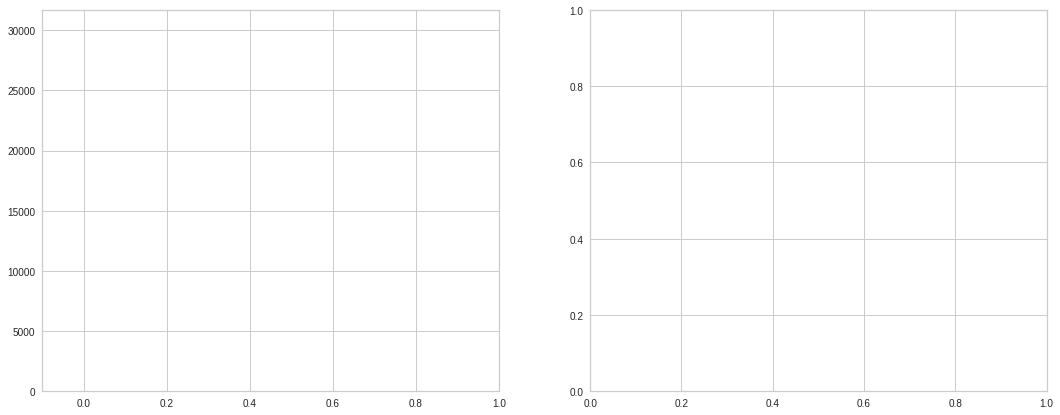

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

from distython import HEOM, HVDM

print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6]
X = df

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    
    # >>>>>>>>> MY EDIT <<<<<<<<<<<<<
    # Declare the HEOM with a correct NaN equivalent value
        
    heom_metric = HEOM(X=X, cat_ix=[21, 22, 23, 24], nan_equivalents=[np.nan, 0])

    # >>>>>>>>> MY EDIT -- end <<<<<<<<<<
    
    
    # >>>>>>>>>>> MY EDIT <<<<<<<<<<
    clusterer = KPrototypes(n_clusters=4, init='Huang', n_init=5, verbose=1, n_jobs=8)
    cluster_labels = clusterer.fit_predict(df, categorical=categories, normalised="normal")
    # >>>>>>>>>>> MY EDIT - end <<<<<<<<<<
    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, metric = heom_metric.heom)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Dimentionality Reduction

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[to_scale])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:,0], y=pca_result[:, 1],
    hue=df['cluster'],
    #palette=sns.color_palette("hls", 10),
    
    legend="full",
    alpha=0.3
)

to_scale = list(df.select_dtypes(exclude='O'))




import hypertools as hyp
from scipy.linalg import toeplitz
from copy import copy

eda = hyp.plot(df[to_scale], '.')

